# REGRESSION EXAMPLE

#####  i will alter this example to be general Polynomial regrssion as a drill for me 
##### i hope it works !!!
so the equation it needs to be trained on :
####  y = a * x ^ 3 + b * x ^ 2 + c * x + d
where a ,b,c and d is the tensorflow variabels , which this model needs to manpulate

### creating data

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
%matplotlib inline

In [115]:
x_data=np.linspace(0,10,1000000)
noise = np.random.normal(loc=0,scale=5,size=len(x_data))

In [116]:
y_labels= (0.8*(x_data**3))+(-8*(x_data**2))+(-3*x_data)+5+noise
y_labels = y_labels

y_pure= (0.8*(x_data**3))+(-8*(x_data**2))+(-3*x_data)+5


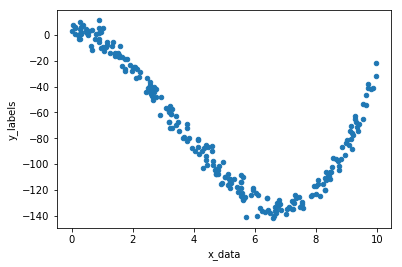

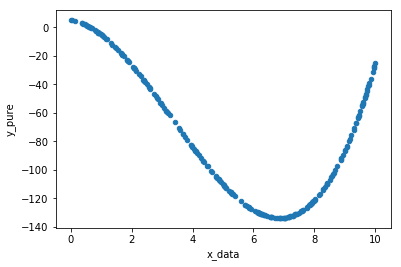

In [117]:
x_df=pd.DataFrame(x_data,columns=['x_data'])
y_df=pd.DataFrame(y_labels,columns=['y_labels'])
my_data=pd.concat([x_df,y_df],axis=1)
sam=my_data.sample(n=250).plot(kind='scatter',x='x_data',y='y_labels')


y_df_pure=pd.DataFrame(y_pure,columns=['y_pure'])
my_data_pure=pd.concat([x_df,y_df_pure],axis=1)
sam=my_data_pure.sample(n=250).plot(kind='scatter',x='x_data',y='y_pure')

### converting data to pandas to draw it easier


In [118]:
x_df=pd.DataFrame(x_data,columns=['x_data'])
y_df=pd.DataFrame(y_labels,columns=['y_labels'])
#noise_df=pd.DataFrame(noise,columns=['noise'])

#### joining data in one data frame 
 using pandas concat

In [119]:
my_data=pd.concat([x_df,y_df],axis=1) # axis = 1 for more than one colum , some how it means that!

In [120]:
my_data.head()

,x_data,y_labels
0,0.00000,-3.339509
1,0.00001,-6.232045
2,0.00002,7.294117
3,0.00003,-2.810514
4,0.00004,-0.574169


#### showing random samples of data 
using pandas sample

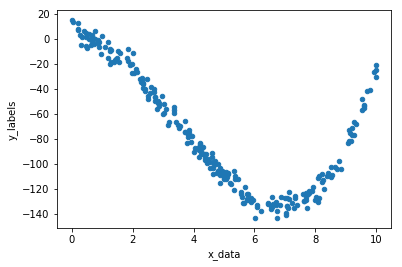

In [121]:
sam=my_data.sample(n=250).plot(kind='scatter',x='x_data',y='y_labels')

### making batches of data 

In [122]:
batch_size=100                                                                 

In [123]:
np.random.randn(4)

array([ 0.30961868, -0.34598448,  0.87542023,  0.46396416])

### creating the variabels

In [124]:
a=tf.Variable(0.88825881)
b=tf.Variable(-0.61821909)
c=tf.Variable(0.54165166)
d=tf.Variable(-1.96073756)

### creating placeholders to feed in the features

In [125]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])


In [126]:
y_model=tf.multiply(a,tf.pow(xph,3))+tf.multiply(b,tf.square(xph))+tf.multiply(c,xph)+d

In [127]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [128]:

optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.000001)# to prvent the gradient decent from overshooting 
optimizer2=tf.train.AdamOptimizer()# adam optimizer will solve the learning rate problems 
train=optimizer2.minimize(error)


In [129]:
init=tf.global_variables_initializer()

In [140]:


def learning_progress_bar(batches,n):
    import sys
    if ((n/batches)*100)==0:
        toolbar_width = 100
        sys.stdout.write("[%s]" % (" "))
        sys.stdout.flush()
        sys.stdout.write("\b" * (toolbar_width))

    if(((n/batches)*100)==int(((n/batches)*100))):
        time.sleep(0.01) # do real work here
        # update the bar
        sys.stdout.write("#")
        
        sys.stdout.flush()
        
        # this ends the progress bar
        
    if ((n/batches)*100)==99:
        sys.stdout.write("]\n")
            
        




In [148]:
with tf.Session() as sess:
    sess.run(init)
    
    batches=90000
    
    for i in range(batches):
        rand_index=np.random.randint(len(x_data),size=batch_size) # getting 8 random index from the data 
        
        feed={xph:x_data[rand_index],yph:y_labels[rand_index]} # feeding the 8 random indexes
        learning_progress_bar(batches,i)
        
        sess.run(train,feed_dict=feed)
    a_model , b_model , c_model , d_model =sess.run([a,b,c,d])
    

[############################################################################################]


In [149]:
a_model , b_model , c_model , d_model

(0.79476339, -7.909503, -3.4023151, 5.3734193)

In [150]:
y_hat=(x_data**3)*a_model+(x_data**2)*b_model+(x_data)*c_model+d_model

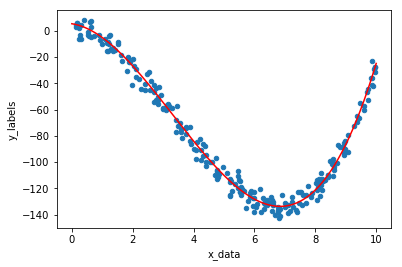

In [151]:
sam=my_data.sample(n=250).plot(kind='scatter',x='x_data',y='y_labels')
plt.plot(x_data,y_hat,'r')


### conclusion
when my learning rate was high the model kept returning nan values for my variabels , which 
may caused by the model overshooting the lowest piont or minimal value of error , which couses 
the values of a,b,c,d to overflow or currupt some how so by lowering the learning rate and manupulating the
numper of batches "tarining epochs" i manged to reach decent results

### conclusion 2 
using the Adam optimizer alowed me to care less about learning rate and batch size , it adapted to the change in the slob and gave me more decent results than before

# TF Estimator API

#### setting our features

In [174]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]

##### setting the estimator type to LinearRegressor

In [175]:
    estiomator=tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_tf_random_seed': None, '_evaluation_master': '', '_task_id': 0, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\TARIQA~1.DIA\\AppData\\Local\\Temp\\tmpnzi6vta0', '_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000249BE183AC8>, '_device_fn': None, '_session_config': None, '_global_id_in_cluster': 0, '_num_worker_replicas': 1, '_train_distribute': None, '_num_ps_replicas': 0, '_service': None, '_keep_checkpoint_max': 5, '_is_chief': True, '_master': '', '_task_type': 'worker', '_save_checkpoints_steps': None}


##### making a test tran split of the previous example data

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
x_train , x_eval , y_train , y_eval =train_test_split(x_data,y_labels,test_size=0.3,random_state=101)

#### the input used  in the actual training 

In [159]:
input_fun=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=20,num_epochs=None,shuffle=True)

#### the input used to evaluate the model against training data

In [160]:
train_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=20,num_epochs=1000,shuffle=False)

#### the input used to evaluate the model against test data

In [161]:
eval_unpu_func=tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=20,num_epochs=1000,shuffle=False)

### training the estimator against the training data

In [162]:
estiomator.train(input_fn=input_fun,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\TARIQA~1.DIA\AppData\Local\Temp\tmpfly4uvna\model.ckpt.
INFO:tensorflow:loss = 190584.0, step = 0
INFO:tensorflow:global_step/sec: 350.461
INFO:tensorflow:loss = 110179.0, step = 100 (0.292 sec)
INFO:tensorflow:global_step/sec: 395.952
INFO:tensorflow:loss = 73280.5, step = 200 (0.226 sec)
INFO:tensorflow:global_step/sec: 563.3
INFO:tensorflow:loss = 69336.5, step = 300 (0.178 sec)
INFO:tensorflow:global_step/sec: 566.483
INFO:tensorflow:loss = 58650.0, step = 400 (0.177 sec)
INFO:tensorflow:global_step/sec: 553.967
INFO:tensorflow:loss = 48612.3, step = 500 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.917
INFO:tensorflow:loss = 25908.1, step = 600 (0.181 sec)
INFO:tensorflow:global_step/sec: 54

INFO:tensorflow:global_step/sec: 455.825
INFO:tensorflow:loss = 23680.8, step = 8200 (0.220 sec)
INFO:tensorflow:global_step/sec: 533.335
INFO:tensorflow:loss = 42375.9, step = 8300 (0.187 sec)
INFO:tensorflow:global_step/sec: 481.998
INFO:tensorflow:loss = 30833.0, step = 8400 (0.207 sec)
INFO:tensorflow:global_step/sec: 611.48
INFO:tensorflow:loss = 18614.7, step = 8500 (0.164 sec)
INFO:tensorflow:global_step/sec: 622.705
INFO:tensorflow:loss = 15267.2, step = 8600 (0.161 sec)
INFO:tensorflow:global_step/sec: 455.802
INFO:tensorflow:loss = 18897.7, step = 8700 (0.220 sec)
INFO:tensorflow:global_step/sec: 576.255
INFO:tensorflow:loss = 29479.8, step = 8800 (0.173 sec)
INFO:tensorflow:global_step/sec: 626.667
INFO:tensorflow:loss = 22391.2, step = 8900 (0.161 sec)
INFO:tensorflow:global_step/sec: 622.776
INFO:tensorflow:loss = 11105.0, step = 9000 (0.160 sec)
INFO:tensorflow:global_step/sec: 607.684
INFO:tensorflow:loss = 17236.5, step = 9100 (0.165 sec)
INFO:tensorflow:global_step/sec

### evaluating estimator model against training data

In [163]:
train_metrics =estiomator.evaluate(train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-25-16:04:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\TARIQA~1.DIA\AppData\Local\Temp\tmpfly4uvna\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-25-16:05:01
INFO:tensorflow:Saving dict for global step 10000: average_loss = 1151.36, global_step = 10000, label/mean = -76.6178, loss = 23027.3, prediction/mean = -75.1264
INFO:tensorflow:Saving 'checkpoint

### evaluating estimator model against test data


In [164]:
eval_metrics =estiomator.evaluate(eval_unpu_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-25-16:05:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\TARIQA~1.DIA\AppData\Local\Temp\tmpfly4uvna\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-25-16:05:10
INFO:tensorflow:Saving dict for global step 10000: average_loss = 1161.67, global_step = 10000, label/mean = -76.3111, loss = 23233.5, prediction/mean = -75.0745
INFO:tensorflow:Saving 'checkpoint

In [165]:
print ("Training Data Metrics")
print(train_metrics)


Training Data Metrics
{'loss': 23027.275, 'label/mean': -76.617836, 'prediction/mean': -75.126427, 'average_loss': 1151.3638, 'global_step': 10000}


In [166]:
print ("Evaluation Data Metrics")
print(eval_metrics)


Evaluation Data Metrics
{'loss': 23233.451, 'label/mean': -76.311134, 'prediction/mean': -75.074471, 'average_loss': 1161.6726, 'global_step': 10000}


In [167]:
new_data= np.linspace(0,10,10)

In [168]:
input_fun_predict=tf.estimator.inputs.numpy_input_fn({'x':new_data},shuffle=False)

In [169]:
list (estiomator.predict(input_fun_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\TARIQA~1.DIA\AppData\Local\Temp\tmpfly4uvna\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([-14.71125031], dtype=float32)},
 {'predictions': array([-28.15143967], dtype=float32)},
 {'predictions': array([-41.59162903], dtype=float32)},
 {'predictions': array([-55.03181839], dtype=float32)},
 {'predictions': array([-68.47201538], dtype=float32)},
 {'predictions': array([-81.9121933], dtype=float32)},
 {'predictions': array([-95.35238647], dtype=float32)},
 {'predictions': array([-108.79257202], dtype=float32)},
 {'predictions': array([-122.23277283], dtype=float32)},
 {'predictions': array([-135.67294312], dtype=float32)}]

In [170]:
predictions=[]
for pred in estiomator.predict(input_fun_predict):
    predictions.append(pred['predictions'][0])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\TARIQA~1.DIA\AppData\Local\Temp\tmpfly4uvna\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


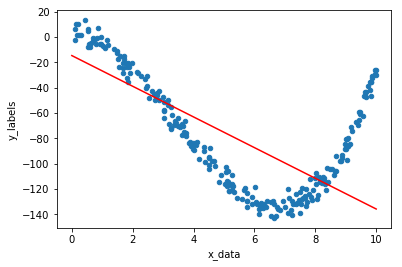

In [172]:
sam=my_data.sample(n=250).plot(kind='scatter',x='x_data',y='y_labels')
plt.plot(new_data,predictions,'r')